In [1]:
import sys
import numpy as np
import cv2
import os
from knn2 import principal
import matplotlib.pyplot as plt

In [2]:
imgTrainingNumbers = cv2.imread("0messigray.png")            # read in training numbers image
imgTrainingNumbers = cv2.imread("test0.jpg")            # read in training numbers image
imgTrainingNumbers = cv2.resize(imgTrainingNumbers,(300,100))
imgGray = cv2.cvtColor(imgTrainingNumbers, cv2.COLOR_BGR2GRAY)          # get grayscale image
imgBlurred = cv2.GaussianBlur(imgGray, (5,5), 0)    
imgBlurred= cv2.medianBlur(imgBlurred,5)   
                                                
imgThresh = cv2.adaptiveThreshold(imgBlurred,                           # input image
                                      255,                                  # make pixels that pass the threshold full white
                                      cv2.ADAPTIVE_THRESH_MEAN_C,       # use gaussian rather than mean, seems to give better results
                                      cv2.THRESH_BINARY_INV,                # invert so foreground will be white, background will be black
                                      11,                                   # size of a pixel neighborhood used to calculate threshold value
                                      2)  

In [3]:
#Conseguimos los contornos de los caracteres y numeros de las placas considerando criterios de tamanos en la imagen 
im2, contours, hierarchy = cv2.findContours(imgThresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
h_list=[]
for contour in contours:
  [x,y,w,h]=cv2.boundingRect(contour)

  if h < 2*w:
    continue
            
  if w < 10 or h < 10:
    continue

  if w>50:
    continue 
            
  h_list.append([x,y,w,h])

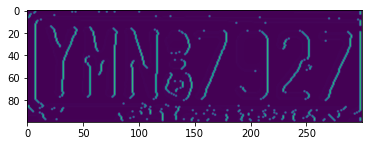

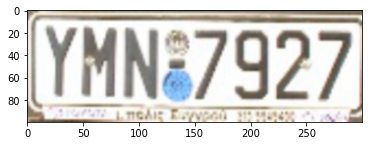

In [4]:
plt.imshow(imgThresh, interpolation="bicubic")
plt.figure()
plt.imshow(imgTrainingNumbers, interpolation="bicubic")

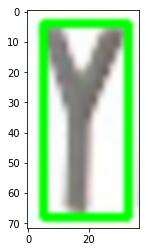

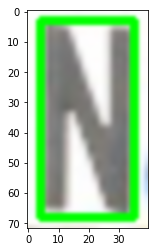

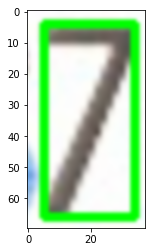

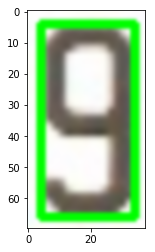

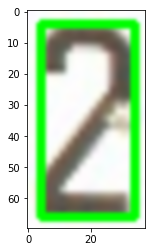

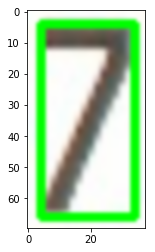

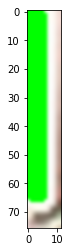

In [5]:
#Ordenamos los rectangulos de izquierda a derecha
x_s=[]
for i in range(0, len(h_list)):
  x_s.append(h_list[i][0])

dic=dict(zip(x_s,h_list))
#Reconocemos cada caracter dentro de los contornos obtenidos
plate_chars=""
for key in sorted(dic):
  [x,y,w,h]=dic[key]
  #rect=cv2.rectangle(imgTrainingNumbers, (x, y), (x + w, y + h), (255, 255,255), 1)
  
  if y-4>0 and x-4>0 and y + h+4<100 and x + w+4<300:
    cropped = imgTrainingNumbers[y-4 :y +  h+4 , x-4 : x + w+4]
  else:
    cropped = imgTrainingNumbers[y-1 :y +  h+1 , x-1 : x + w+1]
  plate_chars=plate_chars+principal(cropped)
  plt.figure()
  plt.imshow(cropped, interpolation="bicubic")
  


In [6]:
print(plate_chars)

YN7927I
